# Avocado Price Analysis

### Problem-1: view the dataset and drop the unwanted column

In [1]:
import pandas as pd
data = pd.read_csv('C:\\Users\\Ebuka\\avocado1.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Problem-2 : inspect the data for missing values and rename the column's header with numeric values

In [3]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Our data shows no missing values

In [4]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The numeric columns were described in the dataset description as Small,Large and Xlarge, so the next line of code would be to rename these columns for proper analysis

In [5]:
df=data.rename(columns ={'4046':'Small', '4225':'Large', '4770':'Xlarge'})
df.head()

,Date,AveragePrice,Total Volume,Small,Large,Xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Problem-3: We Augument our data by adding new columns
Looking at our dataset one would see it is not a datetime,since this is a timeseries task we will have to augment our data by adding new columns for proper time series analysis.

In [6]:
import datetime

dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['Date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
df['Date'] = pd.DataFrame({'Date' : sorteddates})
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.head()
    

C:\Users\Ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys


,Date,AveragePrice,Total Volume,Small,Large,Xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04
2,2015-01-04,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,01,04
3,2015-01-04,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,01,04
4,2015-01-04,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,01,04


### Problem-4:: import libraries for visualisation

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

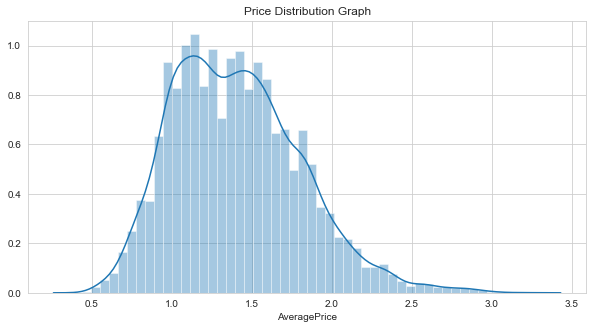

In [8]:
plt.figure(figsize =(10,5))
plt.title("Price Distribution Graph")
ax = sns.distplot(df['AveragePrice'])
plt.show()

##### from the graph above it shows the value of our KDE lies within the average price range of 1.12$

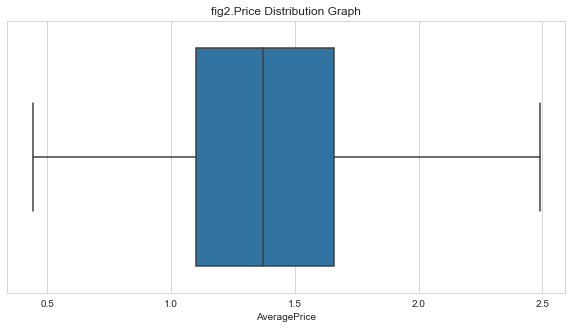

In [9]:
plt.figure(figsize =(10,5))
plt.title("fig2.Price Distribution Graph")
ax = sns.boxplot(df['AveragePrice'], showfliers = False)
plt.show()

##### The above graph was used to ensure our average price weight stays the same

### Problem-5: Try to visualise how the avprices correlates with other variables in our dataset

##### we start out first to finding  how the prices of avocado changes over the month

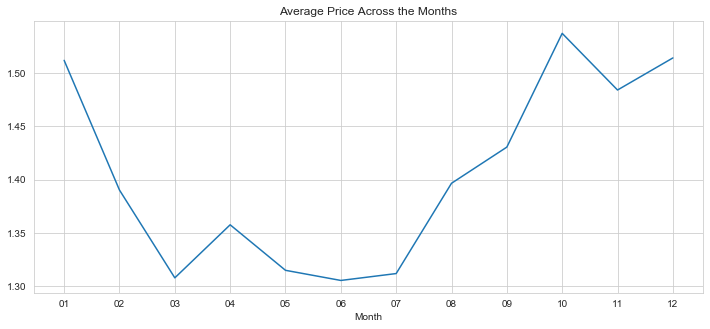

In [11]:
Dategroup = df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0, 13))
Dategroup['AveragePrice'].plot(x=df.Month)
plt.title('Average Price Across the Months')
plt.show()

##### we also check how days of the month affect the prices of avocado

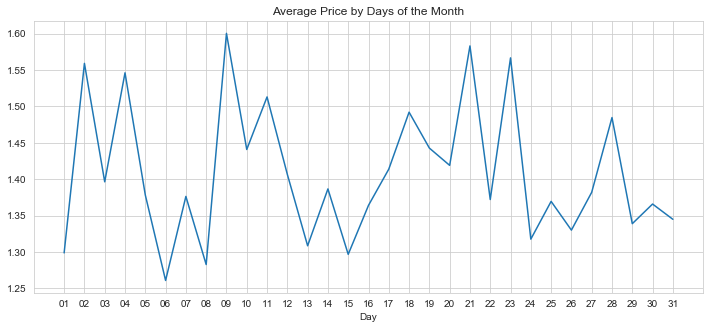

In [12]:
Dategroup = df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0, 31))
Dategroup['AveragePrice'].plot(x=df.Day)
plt.title('Average Price by Days of the Month')
plt.show()

######  the above graph depicts seasonality across the days of the month

### Problem-6: we generate more correlation from our dataset as to how the avprice varries in different regions

C:\Users\Ebuka\anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


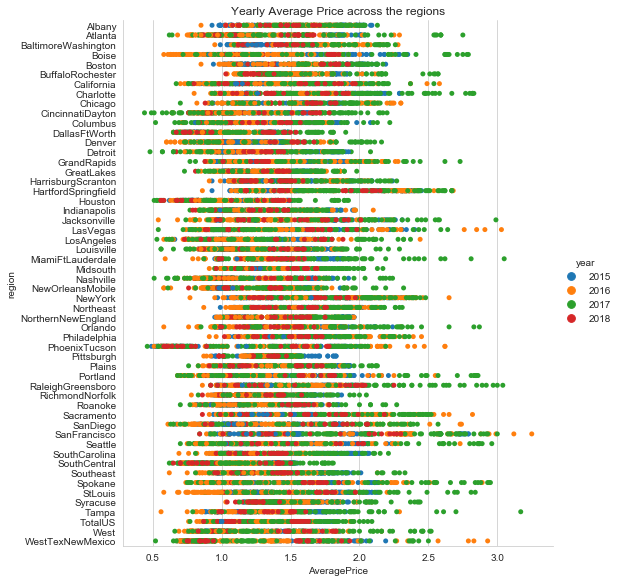

In [13]:
sns.catplot(x='AveragePrice', y='region', data = df, hue = 'year', size =8, jitter=False)
plt.title('Yearly Average Price across the regions')
sns.set_style('whitegrid')

The above graph shows the avprice dispersion of avocado in each region, the plots are quite overlapped, yet it clearly provides us with a significant info about the market. Now we will categorise the avocado according to types to get a deeper meaning off our analysis which is how the prices change according to types

### Problem-7: Extract meaning of how avprice of avocado varries with the types

In [14]:
print(df['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


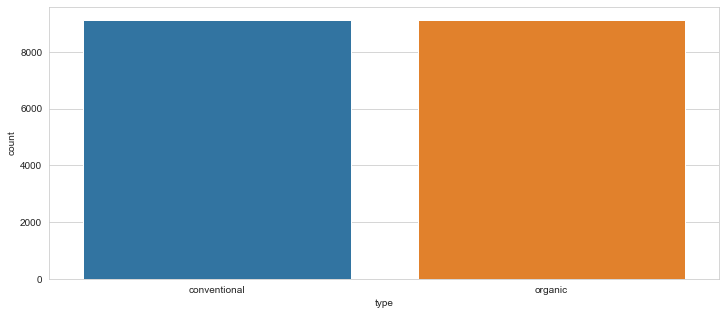

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df['type'])
plt.show()

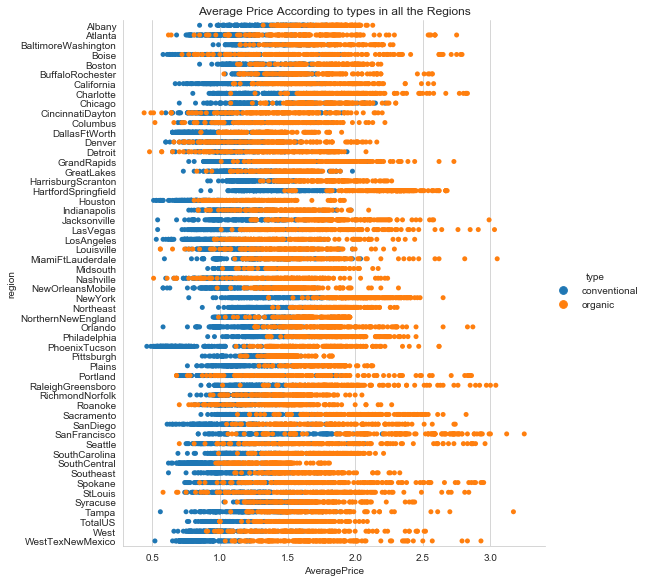

In [16]:
sns.catplot('AveragePrice', y='region', data = df, hue = 'type', size =8, jitter=False)
plt.title('Average Price According to types in all the Regions')
sns.set_style('whitegrid')



Now as we can see from the graph above without doubt, that organic avocado is more expensive in each of the region

### Problem-8: import neccessary libraries for our time series task

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from pandas import DataFrame
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


In [18]:
df = data.loc[:, ['Date', 'AveragePrice']]
df['Date'] = pd.to_datetime(df['Date'])

The above code is to set our target variables and then converting our date to a datetime value. The next line of code will be to verify the date if it was properly converted.

In [19]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [20]:
 df.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


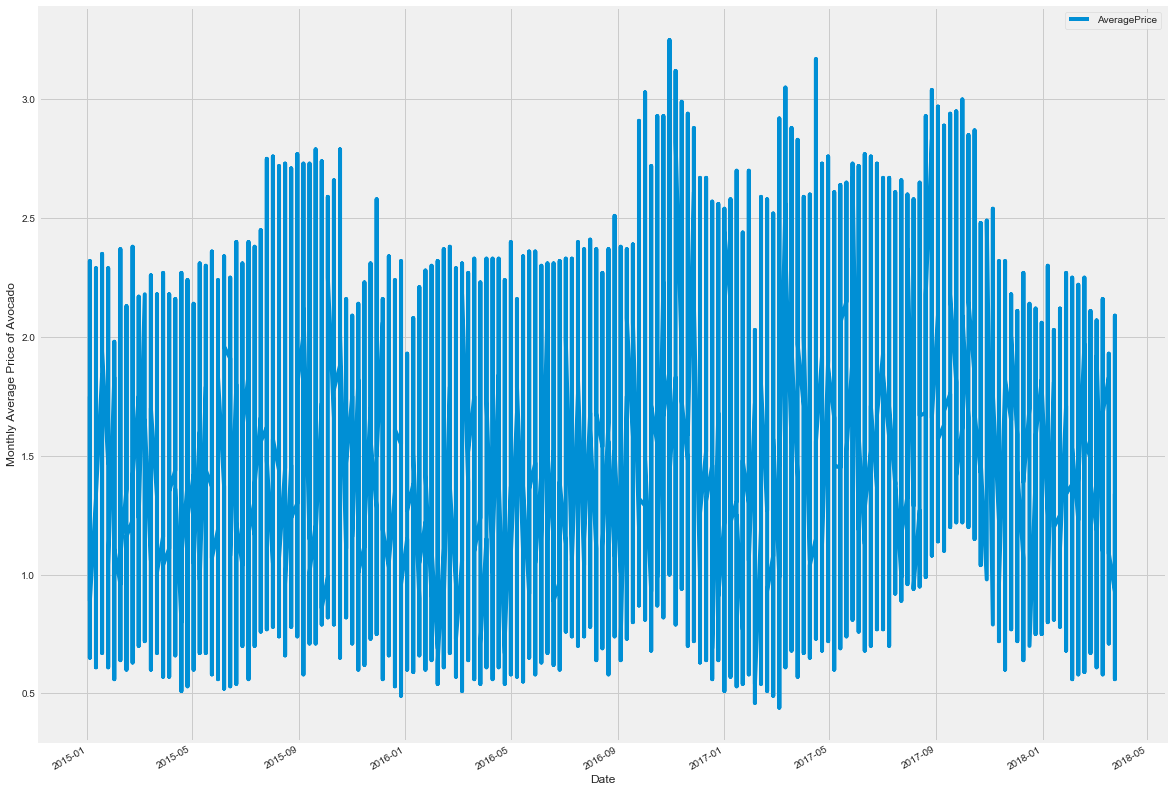

In [21]:
ax=df.set_index('Date').plot(figsize=(18,15))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')
plt.show()



The above plot indicates we have a trend in our dataset, we can draw more insight by applying the correlation plots

### Problem-9: Now we proceed to determining our Arima model parameters(p,d,q)

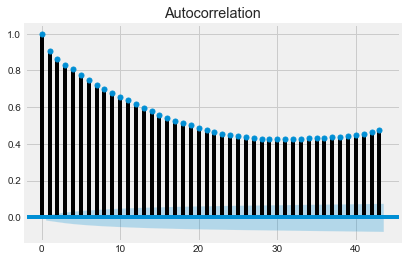

In [22]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.set_index('Date'))
plt.show()

the autocorrelation above shows we have a significant correlation in our data, i.e constant decay. Therefore we reject null hypothesis.

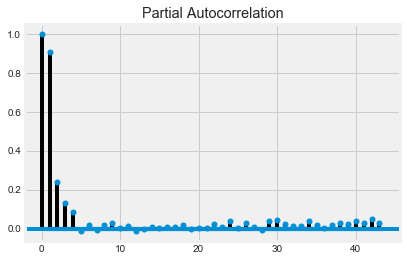

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.set_index('Date'))
plt.show()

The pcf_plot indicates we have a significant lag in the first five steps,so i will pick my p-value from any of 0-5 range. Since our data shows seasonality in the acf i will apply 1st order differencing(d) to make it stationary and then set our moving average (q) equals to 0.

In [24]:
#fit model
import statsmodels.api as sm
model = ARIMA(df.set_index('Date'),order=(5,1,0) )
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.AveragePrice   No. Observations:                18248
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6866.720
Method:                       css-mle   S.D. of innovations              0.166
Date:                Fri, 21 Aug 2020   AIC                         -13719.440
Time:                        22:33:16   BIC                         -13664.757
Sample:                             1   HQIC                        -13701.470
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.448e-05      0.001      0.034      0.973      -0.001       0.001
ar.L1.D.AveragePrice    -0.3389      0.007    -45.805      0.000      -0.353      -0.324
ar.L2.D.AveragePrice    -0.1964      0.008    -25.145      0.000      -0.212      -0.181
ar.L3.D.AveragePrice    -0.1152      0.008    -14.575      0.000      -0.131      -0.100
ar.L4.D.AveragePrice    -0.0164      0.008     -2.103      0.035      -0.032      -0.001
ar.L5.D.AveragePrice    -0.0343      0.007     -4.637      0.000      -0.049      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7409           -0.0000j            1.7409           -0.5000
AR.2           -0.5590           -1.8546j            1.9370           -0.2966
AR.3           -0.5590           +1.8546j            1.9370            0.2966
AR.4            1.1900           -1.7451j            2.1122           -0.1547
AR.5            1.1900           +1.7451j            2.1122            0.1547
-----------------------------------------------------------------------------
"""

The stat summary provides us with a significant amount of information. The p>|z| shows values less than 0.05 which indicates our datasets has been made stationary, so it is reasonable to retain our model. Now we try to plot our residual plot to ensure none of our assumptions have been violated. i.e the residual plots are well distributed

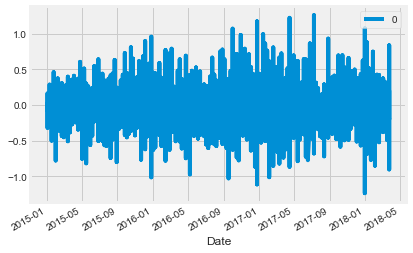

,0
count,18248.000000
mean,-0.000005
std,0.166093
min,-1.233621
25%,-0.072110
50%,0.000797
75%,0.072622
max,1.257896


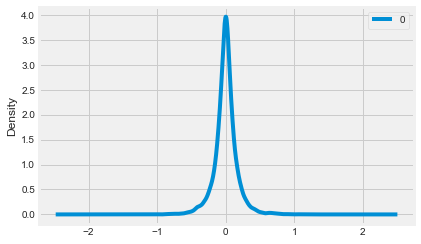

In [25]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
residuals.describe()

The first plot indicates no obvious seasonality and seems to be white-noise as the time series are distributed around 0. The kde plot suggests standard notation for a normal distribution with a mean of 0 and SD of 1. It clearly indicates our residuals are normally distributed

### Problem-10: Making predictions

I tried to use my in sample lagged data to make predictions. Our graph shows clearly that our predictions was able to capture the trend in our data, which is a good indication we have got ourself a good model

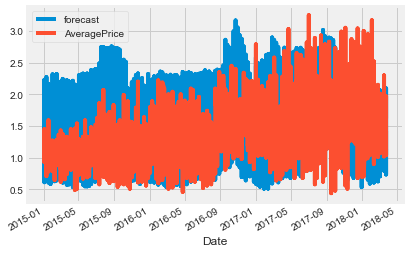

In [26]:
model_fit.plot_predict(dynamic=False)
plt.show()

#### Remark:
In as much as our model gave a really good prediction, it is also good to note that our prediction can still be further improved by apportioning our data into train and test section to create an outsample forecast i.e future forecast.However a more ideal,faster and industrial way to handle seasonal datas using Arima, is by generating tons of parameters using grid search in SARIMAx 'meaning seasonal arima', which is automated to provide us with the best optimized parameters using the "AKAIKE INFORMATION CRITERION(AIC)". Due to the cost of using this method which appears to use up alot of internal memory space in order to process, i will then use Prophet model instead to achieve the same result. 

### Time Series with Prophet Model

In [28]:
from fbprophet import Prophet

In [29]:
# check our data
df.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


Before we proceed, prophet model imposes a strict condition that the input variable of our data be renamed to 'ds' while the dependent variable be renamed to 'y'.

In [30]:
df = df.rename(columns={'Date':'ds','AveragePrice':'y'})
df.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


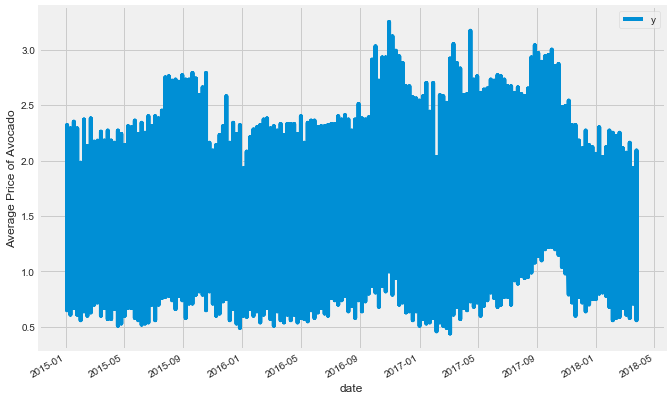

In [31]:
# rechecking our visualization
ax = df.set_index('ds').plot(figsize=(10,7))
ax.set_ylabel('Average Price of Avocado')
ax.set_xlabel('date')

plt.show()

In [32]:
#instantiate our model
my_model = Prophet(interval_width = 0.95, weekly_seasonality=True)

#fit model to our dataframe
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future_dates = my_model.make_future_dataframe(periods = 36,freq='MS')
future_dates.tail()

,ds
18280,2020-11-01
18281,2020-12-01
18282,2021-01-01
18283,2021-02-01
18284,2021-03-01


Here we instructed our model to generate future dates and we wish to predict the period of 3years

In [34]:
forecast = my_model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18280,2020-11-01,0.838328,-0.784720,2.493678
18281,2020-12-01,0.895348,-0.654193,2.649429
18282,2021-01-01,0.778725,-0.877789,2.580611
18283,2021-02-01,0.717830,-0.998467,2.695737
18284,2021-03-01,0.757472,-0.940627,2.835486


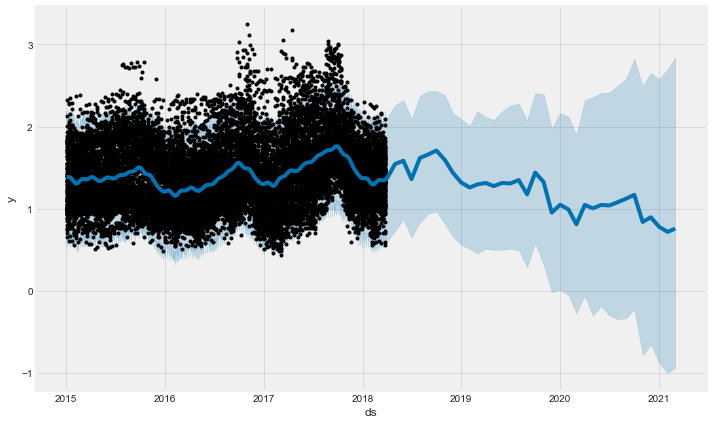

In [35]:
# now lets plot the result of our forecast
fig = my_model.plot(forecast)

The black dots indicate the observed values of our time series while the blue line indicates the forecasted values and the shaded part the uncertainty intervals of our forecast.Now we can decompose our forecast into components,this will help reveal daily,weekly and yearly patterns of the time series.

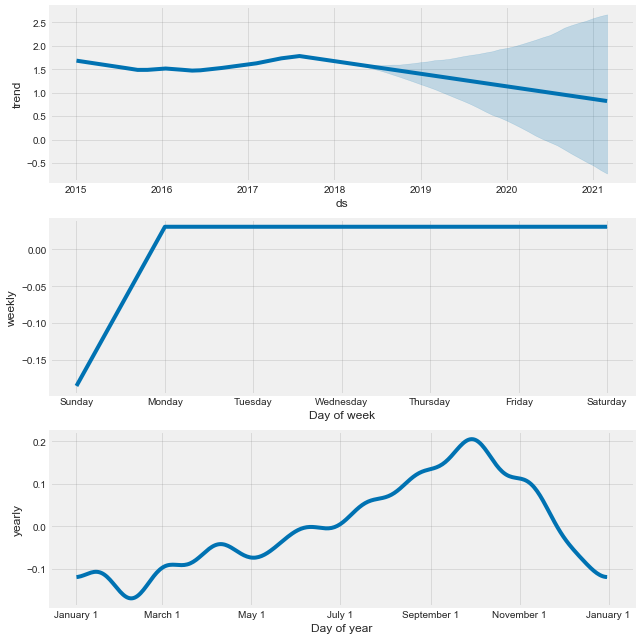

In [36]:
fig = my_model.plot_components(forecast)

###### observations:
- The trend plot indicates an overview that rising prices will fall in the coming years
- The weekly trend suggested price acceleration starting from Sunday and a steady price moving from Monday to Saturday 
- The yearly plot indicate rising prices in the month of October,September and November

In [37]:
forecastnew = forecast['ds']
forecastnew1 =forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew1],axis = 1)
mask = (forecastnew['ds'] > '2018-05-23') & (forecast['ds'] <= '2021-03-01')

forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > '2015-01-03') & (forecastnew['ds'] <= '2018-05-23')
forecastnew = forecastnew.loc[mask]

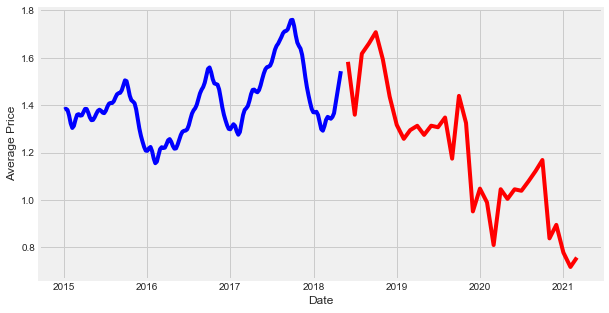

In [39]:
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.plot(forecastnew.set_index('ds'),color='b')
ax1.plot(forecastedvalues.set_index('ds'), color = 'r')
ax1.set_ylabel('Average Price')
ax1.set_xlabel('Date')

plt.show()

The above visualization is showing a systematic decline in prices of avocado in the coming years.The blue line indicates the observed values and the red line indicates the predicted values.